**This notebook covers gradient descent for logistic regression**

In [1]:
# let's import the required set of libraries

import numpy as np
import matplotlib.pyplot as plt
import math, copy


In [2]:
# let's define our training data set

X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

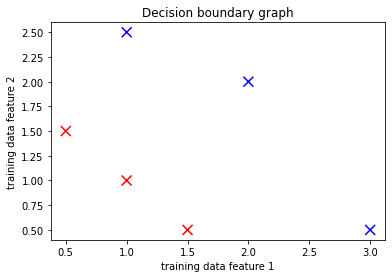

In [3]:
# let's plot the training data set 

# Define custom colors for classes (0 and 1)
colors = ['red' if label == 0 else 'blue' for label in y_train]

# Create a scatter plot with custom marker colors
plt.scatter(X_train[:,0], X_train[:,1], c=colors, marker='x', s=100)  # Adjust marker and size as needed

plt.xlabel("training data feature 1")
plt.ylabel("training data feature 2")
plt.title("Decision boundary graph")
plt.show()

In [4]:
# now let's define the sigmoid function

def sig_fn(z):
    g = 1/(1+np.exp(-z))
    return g

In [5]:
# now let's define the compute gradient function

def compute_gradient_logistic(x,y,w,b):

    size_x = x.shape[0]
    features_x = x.shape[1]
    der_db = 0
    der_dw = np.zeros(w.shape[0])
    for i in range(size_x):
        pred_y = np.dot(x[i], w) + b
        pred_y_sig = sig_fn(pred_y)
        diff = pred_y_sig - y[i]
        for j in range(features_x):
            der_dw[j] += diff * x[i,j]
        der_db += diff

    der_db = der_db/size_x
    der_dw = der_dw/size_x

    return der_db, der_dw

In [6]:
# now let's put our compute gradient logistic function to test

X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [10]:
# let's define compute cost logistic function 

def compute_cost_logistic(x,y,w,b):

    size_x = x.shape[0]
    #epsilon = 1e-15  # Small positive value to avoid log(0) and log(1)
    cost = 0
    for i in range(size_x):
        pred_y = np.dot(x[i], w) +b
        pred_sig_fn = sig_fn(pred_y)
        #pred_sig_fn = np.clip(pred_sig_fn, epsilon, 1 - epsilon)
        loss = -y[i]*np.log(pred_sig_fn) - (1-y[i])*np.log(1-pred_sig_fn)
        cost += loss

    cost = cost/size_x

    return cost



In [15]:
# now let's further write the run gradient descent function 

def run_gradient_descent(x,y,w,b,iter,alpha):

    size_x = x.shape[0]
    features_x = x.shape[1]

    w_tmp = copy.deepcopy(w)
    b_tmp = b

    cost_hist = []

    for i in range(iter):
        dj_db, dj_dw = compute_gradient_logistic(x, y, w_tmp, b_tmp)
        w_tmp = w_tmp - alpha * dj_dw
        b_tmp = b_tmp - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost_hist.append( compute_cost_logistic(x,y,w_tmp,b_tmp) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_hist[-1]}   ")
        
        if cost_hist[i]>cost_hist[i-1]:
            break
    
    return w_tmp, b_tmp, cost_hist


In [16]:
# now let's put our run gradient descent function to test
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = run_gradient_descent(X_train, y_train, w_tmp, b_tmp, iters, alph) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837
